# 🎯 Ejercicio 2.1: Sistema de Routing

**Módulo 2: Patrones Multi-Agente**  
**Tiempo estimado**: 15 minutos  
**Ejercicio**: 2.1

---

## 🎯 Objetivos de Aprendizaje

1. ✅ Implementar classifier con LLM
2. ✅ Crear agentes especializados
3. ✅ Usar conditional_edges para routing
4. ✅ Manejar múltiples rutas


In [1]:
# ╔════════════════════════════════════════════════════════════╗
# ║  📋 SETUP Y VERIFICACIÓN                                  ║
# ╚════════════════════════════════════════════════════════════╝

%pip install -q langgraph langchain-openai python-dotenv

import os, sys
from dotenv import load_dotenv
sys.path.append(os.path.abspath('../..'))
load_dotenv()

print('='*50)
print('   SETUP VERIFICATION')
print('='*50)
print(f"✅ Python {sys.version.split()[0]}")
print(f"{'✅' if os.getenv('OPENAI_API_KEY') else '❌'} OpenAI API Key")
print(f"\n🎬 Ready!\n")

Note: you may need to restart the kernel to use updated packages.
   SETUP VERIFICATION
✅ Python 3.13.7
✅ OpenAI API Key

🎬 Ready!



## 💬 SCRIPT

> "Ejercicio 2.1: Sistema de customer support con especialistas.
> El classifier decide: ¿technical, billing, o general?"

In [2]:
from typing import TypedDict
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

class SupportState(TypedDict):
    query: str
    intent: str
    response: str

llm = ChatOpenAI(model='gpt-4o-mini')
print('✅ Setup completo')

✅ Setup completo


In [3]:
# Classifier - LA CLAVE del routing

def classify_intent(state):
    prompt = f'''Clasifica esta consulta de soporte:
    
    Query: {state["query"]}
    
    Categorías:
    - technical: problemas de API, código, errores
    - billing: pagos, facturas, suscripciones
    - general: otras preguntas
    
    Responde SOLO: technical, billing, o general'''
    
    response = llm.invoke(prompt)
    intent = response.content.strip().lower()
    print(f'🎯 Clasificado como: {intent}')
    return {'intent': intent}

print('✅ Classifier definido')

✅ Classifier definido


In [4]:
# Agentes especializados

def technical_agent(state):
    print('🔧 Agente técnico manejando...')
    response = llm.invoke(f'Responde como experto técnico: {state["query"]}')
    return {'response': response.content}

def billing_agent(state):
    print('💰 Agente de billing manejando...')
    response = llm.invoke(f'Responde como experto en facturación: {state["query"]}')
    return {'response': response.content}

def general_agent(state):
    print('💬 Agente general manejando...')
    response = llm.invoke(f'Responde de forma general: {state["query"]}')
    return {'response': response.content}

print('✅ Agentes especializados definidos')

✅ Agentes especializados definidos


In [5]:
# Construir grafo con routing

graph = StateGraph(SupportState)

# Agregar nodos
graph.add_node('classifier', classify_intent)
graph.add_node('technical', technical_agent)
graph.add_node('billing', billing_agent)
graph.add_node('general', general_agent)

# Routing desde classifier
graph.add_edge(START, 'classifier')
graph.add_conditional_edges(
    'classifier',
    lambda s: s['intent'],  # ← Decisión basada en intent
    {
        'technical': 'technical',
        'billing': 'billing',
        'general': 'general'
    }
)

# Todos terminan en END
graph.add_edge('technical', END)
graph.add_edge('billing', END)
graph.add_edge('general', END)

app = graph.compile()
print('✅ Sistema de routing compilado')

✅ Sistema de routing compilado


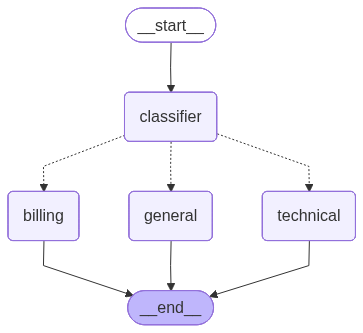

In [7]:
from IPython.display import Image, display
# View
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
# 🎬 DEMO: Diferentes tipos de consultas

test_queries = [
    'Mi API da error 500',
    'Quiero cancelar mi suscripción',
    '¿Qué es LangGraph?'
]

for query in test_queries:
    print('='*60)
    print(f'Query: {query}')
    result = app.invoke({'query': query})
    print(f'Intent: {result["intent"]}')
    print(f'Response: {result["response"][:100]}...')
    print()

Query: Mi API da error 500
🎯 Clasificado como: technical
🔧 Agente técnico manejando...
Intent: technical
Response: Un error 500, también conocido como "Internal Server Error", indica que hay un problema en el servid...

Query: Quiero cancelar mi suscripción
🎯 Clasificado como: billing
💰 Agente de billing manejando...
Intent: billing
Response: Para cancelar tu suscripción, te recomiendo seguir estos pasos generales, ya que el proceso puede va...

Query: ¿Qué es LangGraph?
🎯 Clasificado como: general
💬 Agente general manejando...
Intent: general
Response: LangGraph es una plataforma o herramienta que permite la creación y gestión de gráficos de conocimie...



---

## ✅ CHECKPOINT FINAL

- [ ] Código ejecuta sin errores
- [ ] Conceptos clave entendidos
- [ ] Listos para continuar

### 💬 PREGUNTA:
> "¿Alguna duda antes de continuar?"
